__Title:__ Capstone Project: All Methods

__Authors:__ Will Butler, Robert (Reuven) Derner 

In [1]:
# Import data from github (next phase)
# url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/log2.csv'
# data = pd.read_csv(url, encoding = "utf-8")

In [2]:
# Create a DataFrame from the data
#df = pd.read_csv(file_path, encoding = "utf-8")

## Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [2]:
#file_path = 'C:\\Users\\19405\\Downloads\\final_project(5).csv'
#df = pd.read_csv(file_path)

In [1]:
import pandas as pd
import requests
from io import BytesIO

In [2]:
# Import data from github (next phase)
url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_6120_Capstone_ARW/will/test_output.csv'
df = pd.read_csv(url, encoding = "utf-8")

df.head()

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,01/01/07,314608.6399,00:00:00,01/01/07 00:00:00 Coal
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,01/01/07,314608.6399,00:15:00,01/01/07 00:15:00 Coal
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,01/01/07,314608.6399,00:30:00,01/01/07 00:30:00 Coal
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.700590,Coal,01/01/07,314608.6399,00:45:00,01/01/07 00:45:00 Coal
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,01/01/07,314608.6399,01:00:00,01/01/07 01:00:00 Coal


In [3]:
# Specify the path to your Excel file
excel_file_path = 'C:/Users/19405/Downloads/Capstone_Weather_Data (1).xlsx'

# Specify the sheet name
sheet_name = 'Combined Weather'

# Use pandas to read the Excel file and create a DataFrame from a specific sheet
df_weather = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Display the DataFrame
df_weather.head()

,Date,Year,Month,Day,Temp Max,Temp Avg,TempMin,Dew Point Max,Dew Point Avg,Dew Point Min,...,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressures Inch Max,Pressure InchAvg,Pressure Inch Min,Precipitation Total,Weather Station,ERCOT Region,Unnamed: 22
0,2007-01-01,2007,1,1.0,48,35.5,24,28,24,21,...,13,8,3,27.3,27.3,27.2,0,Midland International Air And Space Port Station,Far West,NaN
1,2007-01-02,2007,1,2.0,43,35.4,27,26,24.3,23,...,9,6.7,5,27.3,27.3,27.2,0,Midland International Air And Space Port Station,Far West,NaN
2,2007-01-03,2007,1,3.0,45,39.9,30,41,35,0,...,20,7.2,0,27.2,27.1,27,0,Midland International Air And Space Port Station,Far West,NaN
3,2007-01-04,2007,1,4.0,70,45.2,37,41,35.8,26,...,22,10.1,0,27,26.9,26.6,0,Midland International Air And Space Port Station,Far West,NaN
4,2007-01-05,2007,1,5.0,72,52,37,34,27.5,0,...,28,12.9,0,26.9,26.8,26.7,0,Midland International Air And Space Port Station,Far West,NaN


In [4]:
#### Combine the data

# Conver the date fields to a common format
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format = '%m/%d/%y')

In [5]:
# Assuming df is your DataFrame with a date column 'Date'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display the DataFrame to inspect the changes
print(df)

                                              HashedIndex       Demand   Fuel  \
0       f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...  3376.329577   Coal   
1       ede6098380c10e48d944288c220849403128f8752402f4...  3368.077206   Coal   
2       be6c8a673a21a9c147a33b75f67679120aa352334e59ba...  3365.003007   Coal   
3       8643933102baf47f748061b6375c2c8f94020317879c88...  3364.700590   Coal   
4       062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...  3337.219223   Coal   
...                                                   ...          ...    ...   
210235  5a9b5f86557c9c72cbc4a1475c82fc44dcbf5e31d8f699...   564.001066    Wnd   
210236  098c0ebffdee4dacd24219f3ebc6da3c8a84b99a6aa2d8...   558.927514    Wnd   
210237  d29254b8ca291cab784ca9e6dcea1795322ff831b0b70a...   540.610137    Wnd   
210238  5dbc840df98147df4cfb3b3221dd8db292603f4880da29...   533.719670    Wnd   
210239  2ee53f5293452a3d0c21fbf5378fa022b154cc18ca82e7...   543.553356    Wnd   

             Date     Daily

In [6]:
# Perform the join on the common date field
merged_df = pd.merge(df, df_weather, on='Date')

# Display the merged DataFrame
merged_df.head(10)

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Year,Month,Day,...,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressures Inch Max,Pressure InchAvg,Pressure Inch Min,Precipitation Total,Weather Station,ERCOT Region,Unnamed: 22
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,13,8,3,27.3,27.3,27.2,0,Midland International Air And Space Port Station,Far West,NaN
1,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,13,9.5,6,26.9,26.9,26.8,0,Lubbock Preston Smith International Airport St...,North,NaN
2,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,23,8.4,0,30.3,30.2,30.2,0,Corpus Christi International Airport Station,South,NaN
3,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,16,9,5,30.3,30.2,30.2,0,William Hobby Airport Station,Coast,NaN
4,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,14,6.8,0,29.8,29.7,29.6,0,Tyler Pounds Regional Airport Station,East,NaN
5,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,13,7.2,0,29.8,29.7,29.7,0,Austin Bergstrom Interntional Airport Station,West,NaN
6,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,13,7.6,0,28.5,28.4,28.4,0,Abilene Regional Airport Staiton,West,NaN
7,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,14,7.1,0,29.9,29.8,29.7,0,Dallas Love Field,North Central,NaN
8,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.6399,00:15:00,01/01/07 00:15:00 Coal,2007,1,1.0,...,13,8,3,27.3,27.3,27.2,0,Midland International Air And Space Port Station,Far West,NaN
9,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.6399,00:15:00,01/01/07 00:15:00 Coal,2007,1,1.0,...,13,9.5,6,26.9,26.9,26.8,0,Lubbock Preston Smith International Airport St...,North,NaN


In [7]:
# Display the merged DataFrame, examine the change over
merged_df.head(15)

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Year,Month,Day,...,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressures Inch Max,Pressure InchAvg,Pressure Inch Min,Precipitation Total,Weather Station,ERCOT Region,Unnamed: 22
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,13,8,3,27.3,27.3,27.2,0,Midland International Air And Space Port Station,Far West,NaN
1,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,13,9.5,6,26.9,26.9,26.8,0,Lubbock Preston Smith International Airport St...,North,NaN
2,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,23,8.4,0,30.3,30.2,30.2,0,Corpus Christi International Airport Station,South,NaN
3,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,16,9,5,30.3,30.2,30.2,0,William Hobby Airport Station,Coast,NaN
4,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,14,6.8,0,29.8,29.7,29.6,0,Tyler Pounds Regional Airport Station,East,NaN
5,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,13,7.2,0,29.8,29.7,29.7,0,Austin Bergstrom Interntional Airport Station,West,NaN
6,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,13,7.6,0,28.5,28.4,28.4,0,Abilene Regional Airport Staiton,West,NaN
7,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,14,7.1,0,29.9,29.8,29.7,0,Dallas Love Field,North Central,NaN
8,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.6399,00:15:00,01/01/07 00:15:00 Coal,2007,1,1.0,...,13,8,3,27.3,27.3,27.2,0,Midland International Air And Space Port Station,Far West,NaN
9,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.6399,00:15:00,01/01/07 00:15:00 Coal,2007,1,1.0,...,13,9.5,6,26.9,26.9,26.8,0,Lubbock Preston Smith International Airport St...,North,NaN


We are getting duplicaiton of the variables for each of the 15 minute intervals so we will have to create a measure that reduces demand by that factor per day for each of the regions

In [8]:
#drop unecessary column
merged_df = merged_df.drop('Unnamed: 22', axis=1)

#check df
merged_df.head()

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Year,Month,Day,...,Humidity Percent Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressures Inch Max,Pressure InchAvg,Pressure Inch Min,Precipitation Total,Weather Station,ERCOT Region
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,41,13,8,3,27.3,27.3,27.2,0,Midland International Air And Space Port Station,Far West
1,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,45,13,9.5,6,26.9,26.9,26.8,0,Lubbock Preston Smith International Airport St...,North
2,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,32,23,8.4,0,30.3,30.2,30.2,0,Corpus Christi International Airport Station,South
3,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,32,16,9,5,30.3,30.2,30.2,0,William Hobby Airport Station,Coast
4,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,41,14,6.8,0,29.8,29.7,29.6,0,Tyler Pounds Regional Airport Station,East


### Examine the data

In [9]:
merged_df.shape

(1681920, 28)

__Missing Values__  
The dataset contains significant portion of missing values throughout the dataset, we will need to use various methods for imputation of the missing values.

In [10]:
merged_df.isnull().sum()

HashedIndex             0
Demand                  0
Fuel                    0
Date                    0
Daily MWH               0
Time                    0
Combined                0
Year                    0
Month                   0
Day                     0
Temp Max                0
Temp Avg                0
TempMin                 0
Dew Point Max           0
Dew Point Avg           0
Dew Point Min           0
Humidity Percent Max    0
Humidity Percent Avg    0
Humidity Percent Min    0
Wind Speed Max          0
Wind Speed Avg          0
Wind Speed Min          0
Pressures Inch Max      0
Pressure InchAvg        0
Pressure Inch Min       0
Precipitation Total     0
Weather Station         0
ERCOT Region            0
dtype: int64

In [11]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(merged_df[merged_df.columns[merged_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / merged_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent


In [12]:
merged_df.describe()

,Demand,Daily MWH,Year,Month,Day
count,1.681920e+06,1.681920e+06,1681920.0,1.681920e+06,1.681920e+06
mean,1.448501e+03,1.390681e+05,2007.0,6.526027e+00,1.572055e+01
std,1.701482e+03,1.552325e+05,0.0,3.447852e+00,8.796250e+00
min,0.000000e+00,1.427483e+02,2007.0,1.000000e+00,1.000000e+00
25%,8.113114e+01,9.347069e+03,2007.0,4.000000e+00,8.000000e+00
50%,6.283939e+02,6.019514e+04,2007.0,7.000000e+00,1.600000e+01
75%,2.889410e+03,2.920635e+05,2007.0,1.000000e+01,2.300000e+01
max,1.020525e+04,6.667451e+05,2007.0,1.200000e+01,3.100000e+01


We can see that many of the fields that should be numeric are not numeric fields 

In [52]:
# List of columns to convert to float
columns_to_convert = ['Temp Max', 'Temp Avg',
       'TempMin', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
       'Humidity Percent Max', 'Humidity Percent Avg', 'Humidity Percent Min',
       'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
       'Pressures Inch Max', 'Pressure InchAvg', 'Pressure Inch Min',
       'Precipitation Total']

# Convert the specified columns to float
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(float)

### Examine any Correlations 

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


C:\Users\19405\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
correlation_matrix = merged_df.corr()

In [15]:
correlation_matrix

,Demand,Daily MWH,Year,Month,Day
Demand,1.000000,0.950314,NaN,0.024007,-0.003718
Daily MWH,0.950314,1.000000,NaN,0.025362,-0.004016
Year,NaN,NaN,NaN,NaN,NaN
Month,0.024007,0.025362,NaN,1.000000,0.011893
Day,-0.003718,-0.004016,NaN,0.011893,1.000000


There is limited relationships being examined through the corelation analysis. The most pronounced relationship with our target variable is between x20 & x23 having an inverse relationship at -0.24 indicating the lower x23 & x20 are the more likely to have a positive instance. 

## EDA Exploratory Data Analysis

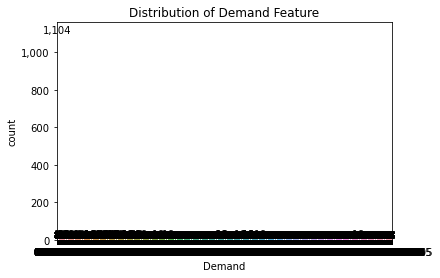

In [27]:
#Visualize the distribution of the target variable
ax = sns.countplot(x='Demand', data=merged_df)
plt.title('Distribution of Demand Feature')

# Add annotations for the count of each class
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count:,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()


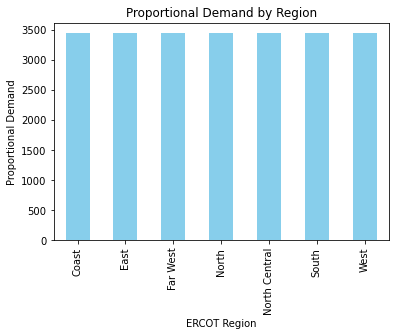

In [29]:
# Calculate the proportional demand for each row within its sector
merged_df['ProportionalDemand'] = merged_df['Demand'] / merged_df.groupby('ERCOT Region')['Demand'].transform('sum') * merged_df['Demand']


In [18]:
# Convert 'Interval' to timedelta for easier manipulation
merged_df['Interval'] = pd.to_timedelta(merged_df['Time'])

# Calculate the sum of demand for each region and interval
merged_df['SumDemand'] = merged_df.groupby(['ERCOT Region', 'Interval'])['Demand'].transform('sum')

# Calculate the proportional demand
merged_df['ProportionalDemand'] = merged_df['Demand'] / merged_df['SumDemand']

# Print the resulting DataFrame
print(merged_df)

                                               HashedIndex       Demand  \
0        f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...  3376.329577   
1        f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...  3376.329577   
2        f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...  3376.329577   
3        f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...  3376.329577   
4        f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...  3376.329577   
...                                                    ...          ...   
1681915  2ee53f5293452a3d0c21fbf5378fa022b154cc18ca82e7...   543.553356   
1681916  2ee53f5293452a3d0c21fbf5378fa022b154cc18ca82e7...   543.553356   
1681917  2ee53f5293452a3d0c21fbf5378fa022b154cc18ca82e7...   543.553356   
1681918  2ee53f5293452a3d0c21fbf5378fa022b154cc18ca82e7...   543.553356   
1681919  2ee53f5293452a3d0c21fbf5378fa022b154cc18ca82e7...   543.553356   

          Fuel       Date     Daily MWH      Time                Combined  \
0         Coal 2007-01

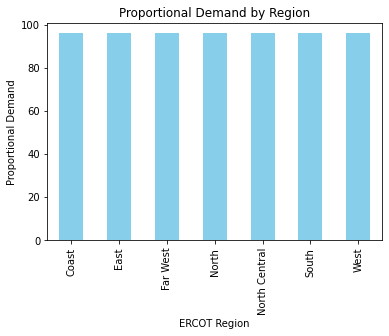

In [19]:
# Plot the bar chart
merged_df.groupby('ERCOT Region')['ProportionalDemand'].sum().plot(kind='bar', color='skyblue')
plt.title('Proportional Demand by Region')
plt.xlabel('ERCOT Region')
plt.ylabel('Proportional Demand')
plt.show()

In [20]:
merged_df.head(5)

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Year,Month,Day,...,Wind Speed Min,Pressures Inch Max,Pressure InchAvg,Pressure Inch Min,Precipitation Total,Weather Station,ERCOT Region,Interval,SumDemand,ProportionalDemand
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,3,27.3,27.3,27.2,0,Midland International Air And Space Port Station,Far West,0 days,2.777036e+06,0.001216
1,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,6,26.9,26.9,26.8,0,Lubbock Preston Smith International Airport St...,North,0 days,2.777036e+06,0.001216
2,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,0,30.3,30.2,30.2,0,Corpus Christi International Airport Station,South,0 days,2.777036e+06,0.001216
3,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,5,30.3,30.2,30.2,0,William Hobby Airport Station,Coast,0 days,2.777036e+06,0.001216
4,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,...,0,29.8,29.7,29.6,0,Tyler Pounds Regional Airport Station,East,0 days,2.777036e+06,0.001216


### Univariate Analysis

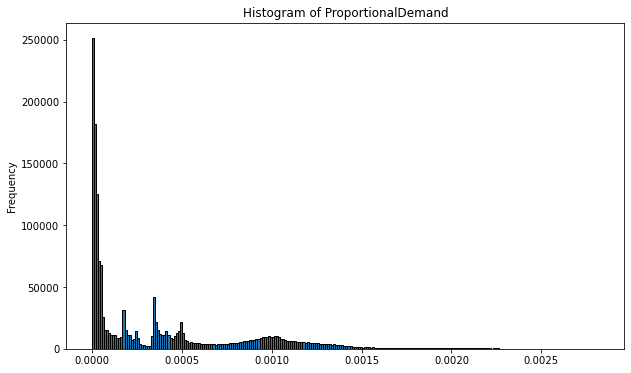

In [21]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['ProportionalDemand'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of ProportionalDemand')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

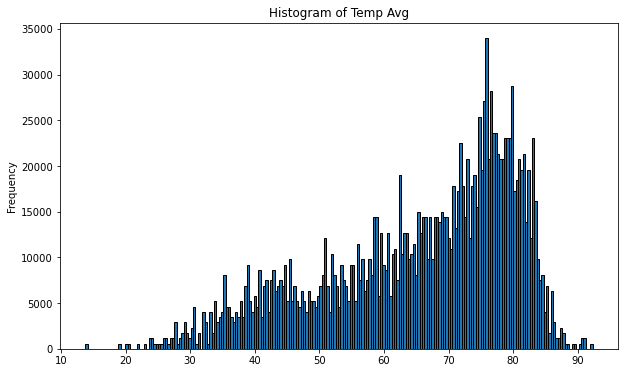

In [22]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Temp Avg'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Temp Avg')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

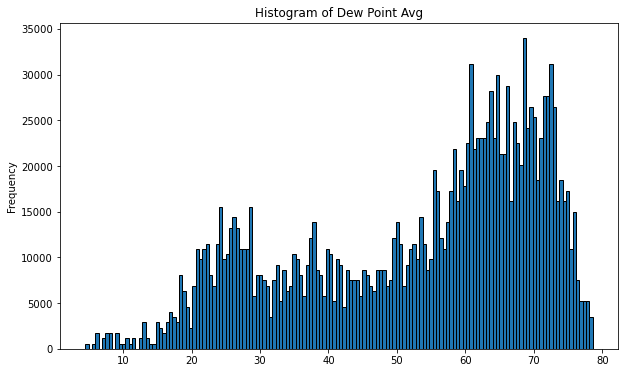

In [23]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Dew Point Avg'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Avg')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

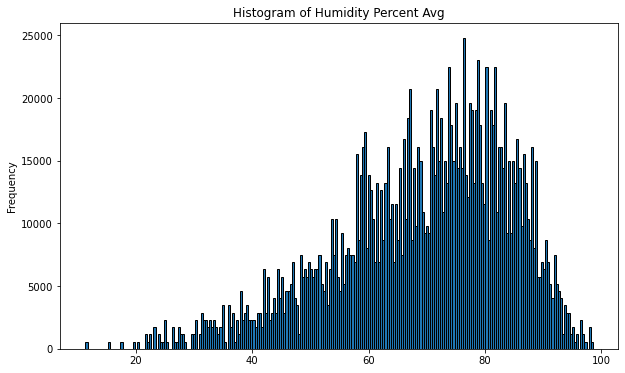

In [24]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Humidity Percent Avg'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Humidity Percent Avg')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

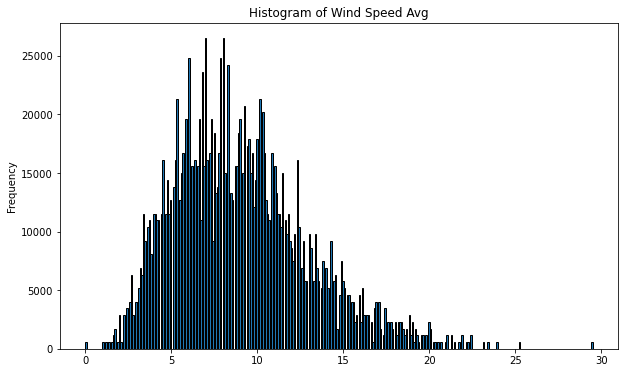

In [25]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Wind Speed Avg'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Wind Speed Avg')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

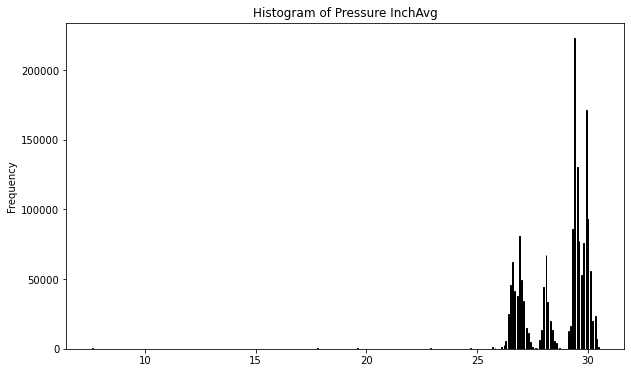

In [26]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Pressure InchAvg'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Pressure InchAvg')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

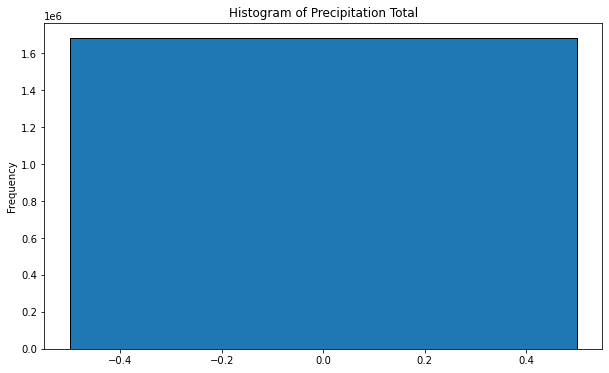

In [27]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Precipitation Total'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Precipitation Total')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Plotting the histogram
#plt.figure(figsize=(10, 6))
#sns.boxplot(df['x0'])  
#plt.title('Box & Whisker Plot of x0')
#plt.xlabel('x0')
#plt.ylabel('Values')
#plt.show()

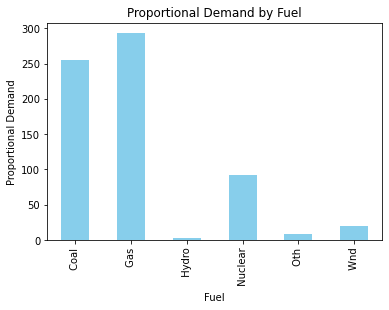

In [28]:
# Plot the bar chart
merged_df.groupby('Fuel')['ProportionalDemand'].sum().plot(kind='bar', color='skyblue')
plt.title('Proportional Demand by Fuel')
plt.xlabel('Fuel')
plt.ylabel('Proportional Demand')
plt.show()

x37 and x32 should be handled converted to numerics during imputating any missing data.

### Imputation

In [56]:
# List of categorical columns to one-hot encode
categorical_columns = ['Fuel', 'Weather Station', 'ERCOT Region']

# Use pd.get_dummies to create dummy variables
imp_df = pd.get_dummies(merged_df, columns=categorical_columns, prefix=categorical_columns)

imp_df.head()

,HashedIndex,Demand,Date,Daily MWH,Time,Combined,Year,Month,Day,Temp Max,...,Weather Station_Midland International Air And Space Port Station,Weather Station_Tyler Pounds Regional Airport Station,Weather Station_William Hobby Airport Station,ERCOT Region_Coast,ERCOT Region_East,ERCOT Region_Far West,ERCOT Region_North,ERCOT Region_North Central,ERCOT Region_South,ERCOT Region_West
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,48.0,...,1,0,0,0,0,1,0,0,0,0
1,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,44.0,...,0,0,0,0,0,0,1,0,0,0
2,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,62.0,...,0,0,0,0,0,0,0,0,1,0
3,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,58.0,...,0,0,1,1,0,0,0,0,0,0
4,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1.0,51.0,...,0,1,0,0,1,0,0,0,0,0


In [57]:
print(imp_df.columns)

Index(['HashedIndex', 'Demand', 'Date', 'Daily MWH', 'Time', 'Combined',
       'Year', 'Month', 'Day', 'Temp Max', 'Temp Avg', 'TempMin',
       'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
       'Humidity Percent Max', 'Humidity Percent Avg', 'Humidity Percent Min',
       'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
       'Pressures Inch Max', 'Pressure InchAvg', 'Pressure Inch Min',
       'Precipitation Total', 'Interval', 'SumDemand', 'ProportionalDemand',
       'Fuel_ Coal', 'Fuel_ Gas', 'Fuel_ Hydro', 'Fuel_ Nuclear', 'Fuel_ Oth',
       'Fuel_ Wnd', 'Weather Station_Abilene Regional Airport Staiton',
       'Weather Station_Austin Bergstrom Interntional Airport Station',
       'Weather Station_Corpus Christi International Airport Station',
       'Weather Station_Dallas Love Field',
       'Weather Station_Lubbock Preston Smith International Airport Station',
       'Weather Station_Midland International Air And Space Port Station',
       'Weather Station_T

In [61]:
print(imp_df.dtypes)

HashedIndex                                                                     object
Demand                                                                         float64
Date                                                                    datetime64[ns]
Daily MWH                                                                      float64
Time                                                                            object
Combined                                                                        object
Year                                                                             int64
Month                                                                            int64
Day                                                                            float64
Temp Max                                                                       float64
Temp Avg                                                                       float64
TempMin                                    

### Modeling 

#### Linear Regression

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, explained_variance_score


# List of targets to drop
features_to_drop = ['HashedIndex','Combined','Demand','ProportionalDemand','SumDemand','Interval','Time','Date']

# Split the data into features (X) and target variable (y)
X = imp_df.drop(features_to_drop, axis=1)  # Remove the target variable from features
y = imp_df['ProportionalDemand']


In [80]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)


In [81]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [83]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')

Mean Squared Error: 2.5478181987896938e-08
Mean Absolute Error: 0.00011227332421207242
R^2 Score: 0.8896834515086749
Root Mean Squared Error: 0.0001596188647619602
Explained Variance Score: 0.8896834549958696


Mean Squared Error (MSE):

Score: 2.5478181987896938e-08
Interpretation: MSE measures the average of the squared differences between predicted and actual values. A lower MSE indicates better model performance. In this case, the extremely low MSE suggests that the model's predictions are very close to the actual values.
Mean Absolute Error (MAE):

Score: 0.00011227332421207242
Interpretation: MAE is the average of the absolute differences between predicted and actual values. Similar to MSE, a lower MAE indicates better model performance. The value here is quite small, suggesting that, on average, the model's predictions deviate very little from the actual values.
R^2 Score (Coefficient of Determination):

Score: 0.8896834515086749
Interpretation: R^2 measures the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. In this case, an R^2 score of approximately 0.89 suggests that the model explains about 89% of the variance in the target variable, which is quite good.
Root Mean Squared Error (RMSE):

Score: 0.0001596188647619602
Interpretation: RMSE is the square root of the MSE, providing a similar measure of the average prediction error. The small value indicates that, on average, the model's predictions are very close to the actual values.
Explained Variance Score:

Score: 0.8896834549958696
Interpretation: Similar to R^2, the Explained Variance Score measures the proportion of the variance in the target variable that the model explains. The value of approximately 0.89 aligns with the R^2 score, indicating a high level of explanatory power in the model.
In summary, the model seems to perform very well based on these evaluation metrics. It is providing accurate and precise predictions, explaining a significant portion of the variance in the target variable. The high R^2 score and explained variance score indicate strong predictive performance. Keep in mind that the interpretation of these scores may vary based on the specific context of your problem and the nature of your data.

#### Time Series Models

#### Neural Network Models